In this notebook we analyse WIMD (Wales index of multiple deprivation) data on the number of household that are overcrowded in the local area. A household is overcrowded if there is more than one person per bedroom in that house. The data shows that the local area is among the most overcrowded parts of Wales. This is true for all age groups. Local LSOAs are disproportionately in the top 10 and 1 percentiles of LSOAs in Wales for overcrowding, and also the median and upper and lower quartiles are higher than for the whole of Wales.  

In [1]:
import numpy as np
import pandas as pd

Defining the LSOAs that make up the local area around SRCDC.

In [2]:
grangetown_codes = ['W01001759','W01001760','W01001761','W01001762','W01001764','W01001765',\
                    'W01001766','W01001767','W01001768','W01001946']
canton_codes = ['W01001709', 'W01001710', 'W01001711', 'W01001712', 'W01001713', 'W01001714',\
                'W01001715', 'W01001716', 'W01001717'] 
riverside_codes = ['W01001855', 'W01001856', 'W01001857', 'W01001862']
lsoa_codes = np.concatenate([grangetown_codes, canton_codes, riverside_codes]) 

Load in the data, skipping the meta data at the top. Rename some of the columns to something more user friendly. Strip the white space from each data entry. Order the data by LSOA code. Drop the data entry that corresponds to all of Wales (as opposed to an individual LSOA). Add a column that indicates whether that LSOA is a local one or not.

In [3]:
file = 'overcrowded_households_data.csv'
data = pd.read_csv(file,skiprows=6)
data = data.rename(columns={'Unnamed: 0': 'LSOA name', 'Unnamed: 1': 'LSOA code'})
data['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.strip(), data['LSOA name']))
data['LSOA code'] =  list(map(lambda lsoa_code : lsoa_code.strip(), data['LSOA code']))
data = data.drop(0) #Drop the data for all of Wales
data = data.set_index('LSOA code')
data['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), data.index.values))

This is a function for plotting the above data, separating out the local and non-local LSOAs. It can also pick out local LSOAs in the top nth percentiles, using the percentile option. To find LSOAs in the bottom nth percentile, use percentile = -n. Percentile option only works if plotting a bar chart. The bar chart will plot the top or bottom n percentiles of the LSOAs.

In [4]:
def plot_two_data_sets(stat,data,stat2=None,kind='bar',figsize=(15,7),percentile=10.0): 
    if kind == 'bar':
        percentile/=100.
        order = data[stat].dropna().sort_values().keys()
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                                                             axis=1,keys=['local','non-local'])
        if percentile>0:
            lnl_data.set_index(lnl_data.index.values).loc[order[-int(len(data)*percentile):]].plot(\
                                                                kind=kind,title=stat,figsize=figsize)
            return [code for code in order[-int(len(data)*percentile):] if data['local'][code]==True ]
        else:
            lnl_data.set_index(lnl_data.index.values).loc[order[:-int(len(data)*percentile)]].plot(\
                                                                kind=kind,title=stat,figsize=figsize)
            return [code for code in order[:-int(len(data)*percentile)] if data['local'][code]==True ]

    elif kind == 'scatter':
        data.plot.scatter(x=stat, y=stat2,c='local',colormap='viridis',figsize=figsize)
    else:
        lnl_data = pd.concat([data[data['local']==True][stat],data[data['local']==False][stat]],\
                             axis=1,keys=['local','non-local'])
        lnl_data.plot(kind=kind,title=stat,figsize=figsize)


The data has a mixture of large and small age categories. To begin with we will look at the smallest age categories to get a clear picture of how overcrowding changes with different age groups in the area.

We start by plotting the top 10 percentiles, and then the top 1 percentile of LSOAs for percentage of people living in an overcrowded household. We can clearly see that a lot of the local LSOAs are in the top 10 and 1 percentiles for overcrowding. 

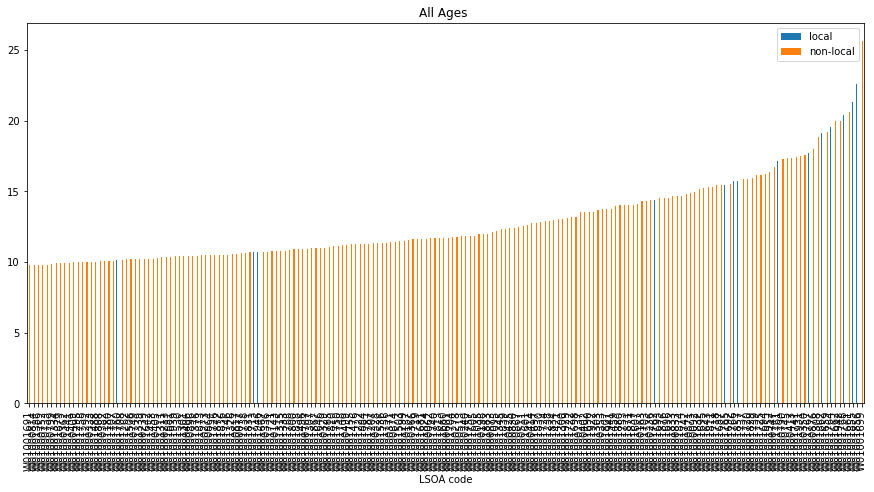

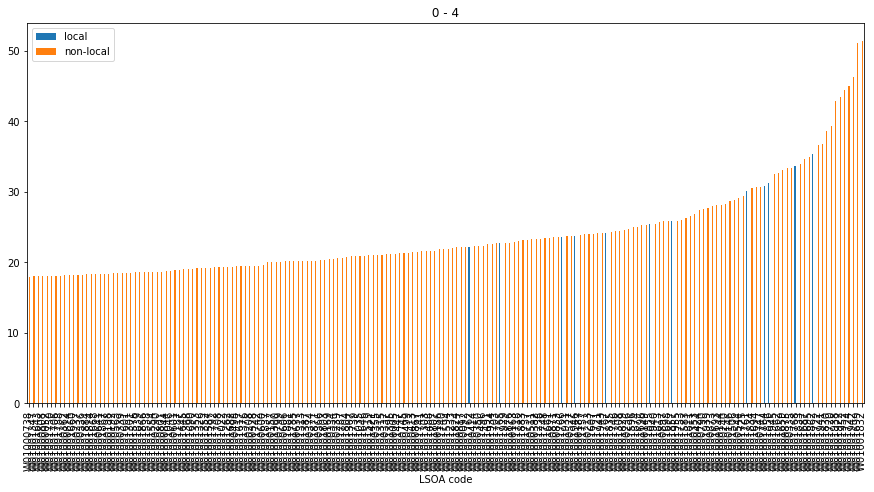

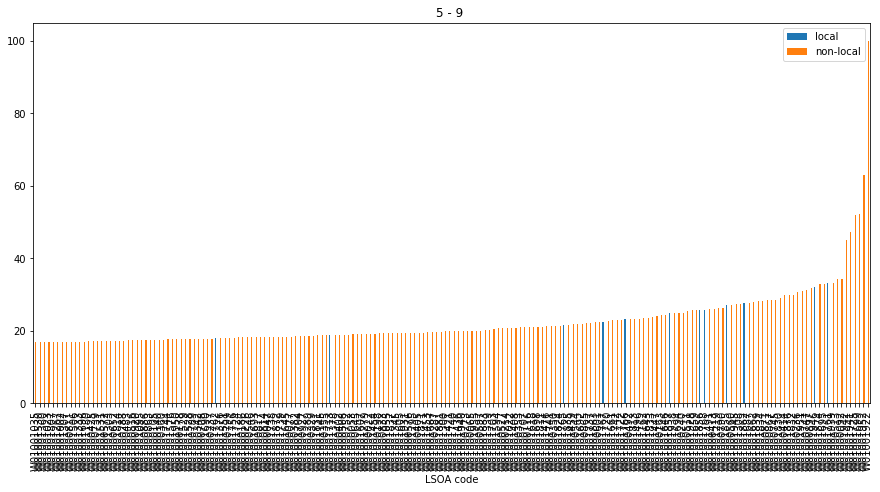

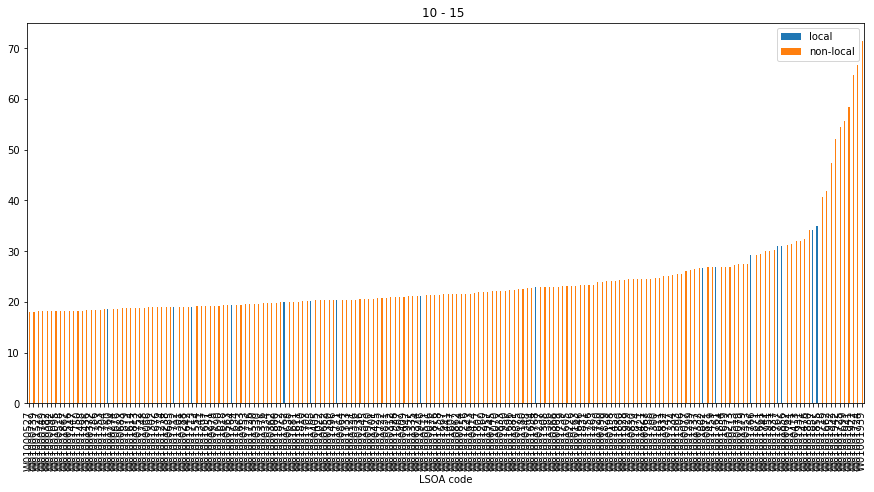

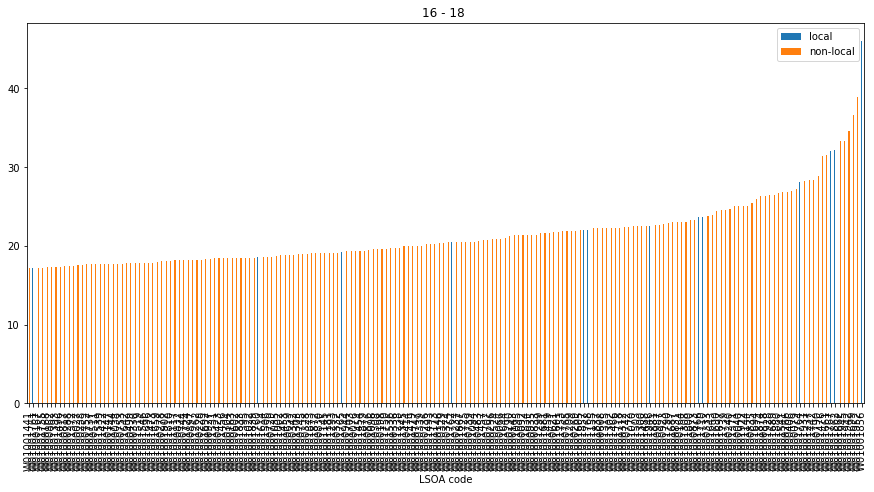

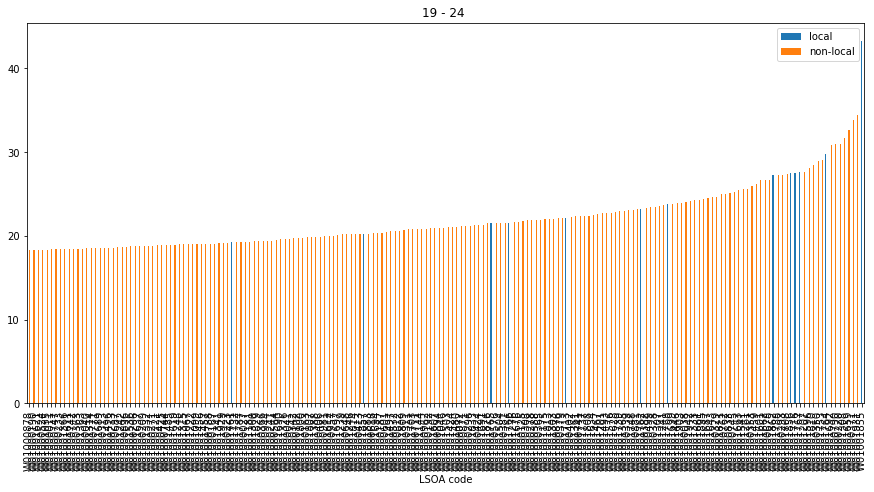

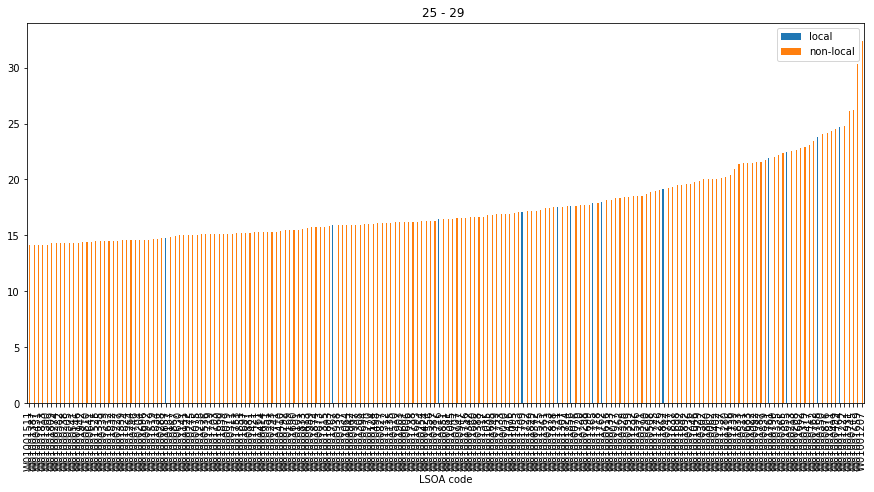

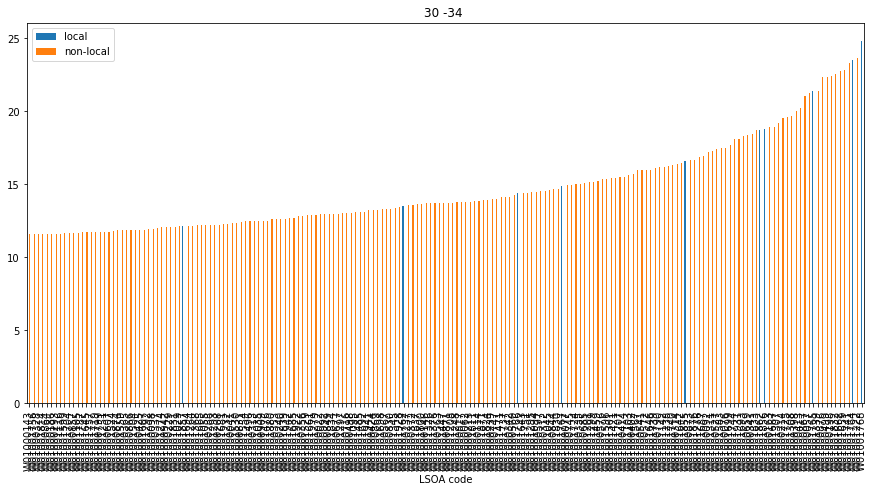

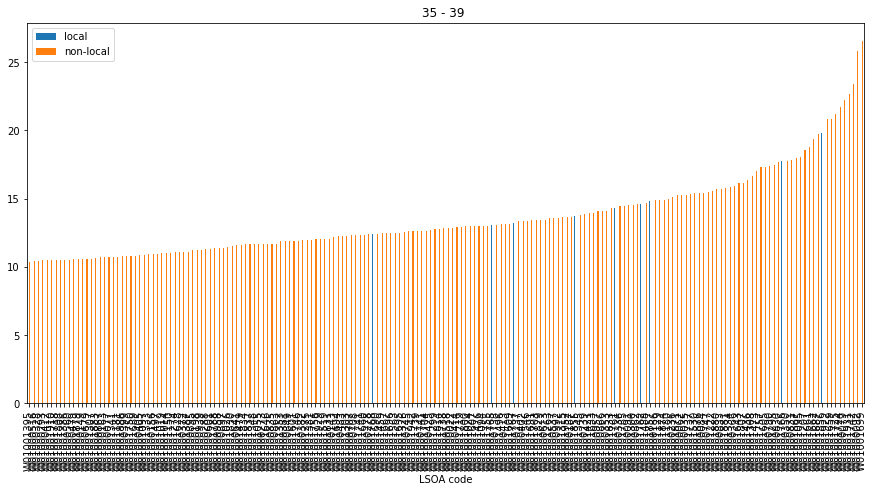

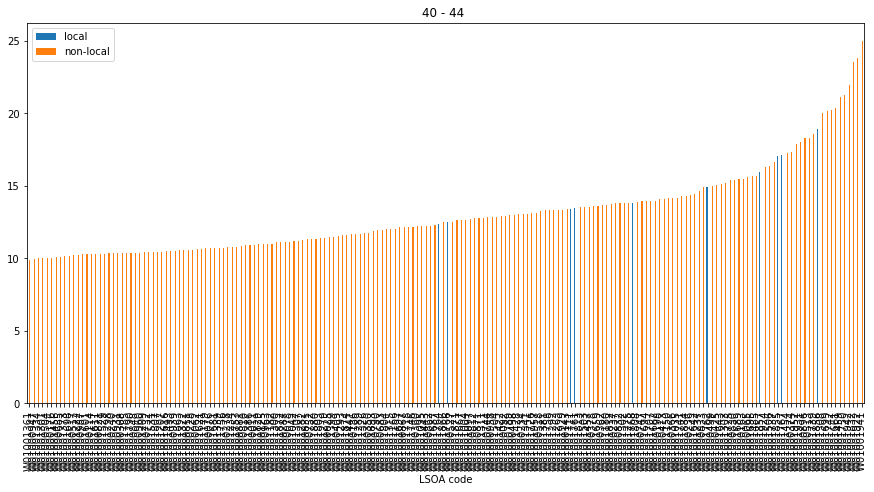

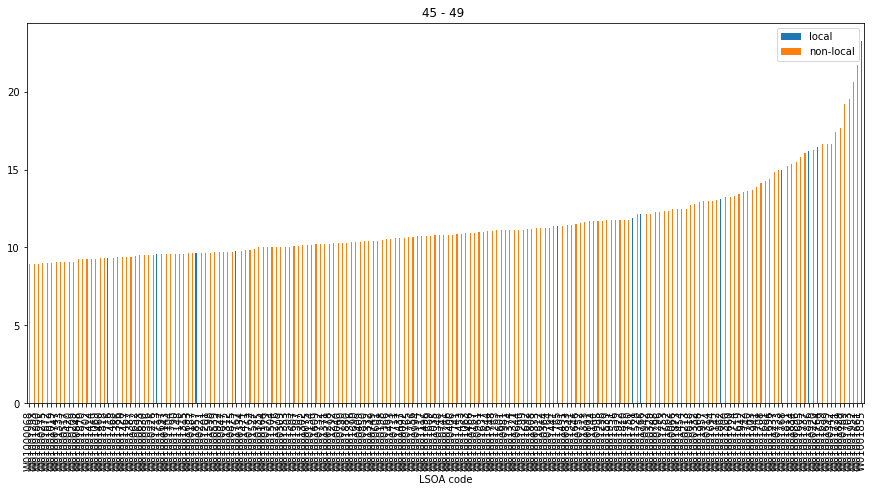

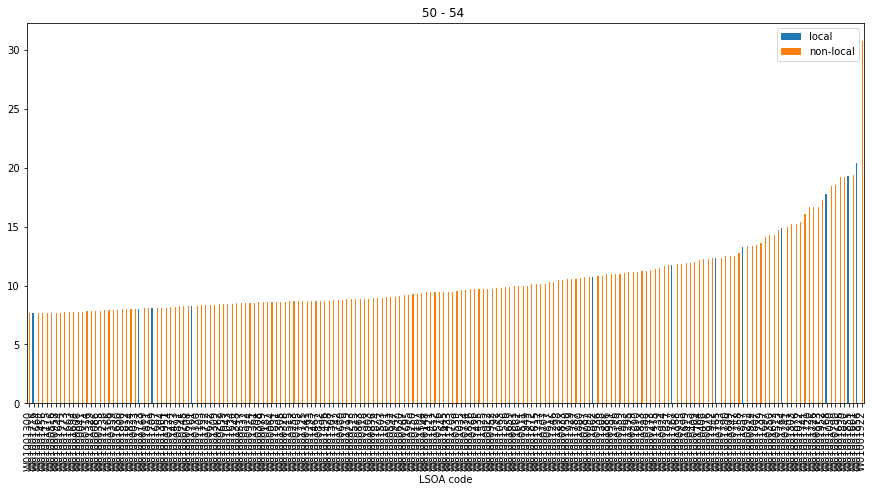

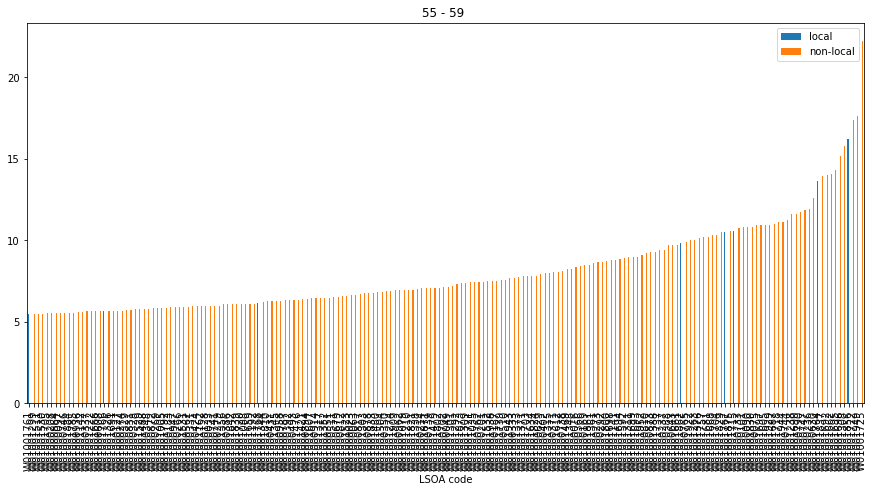

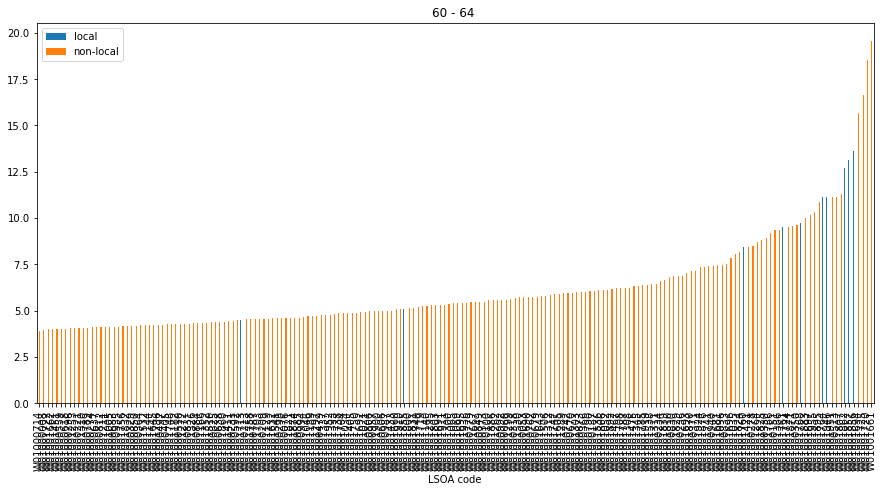

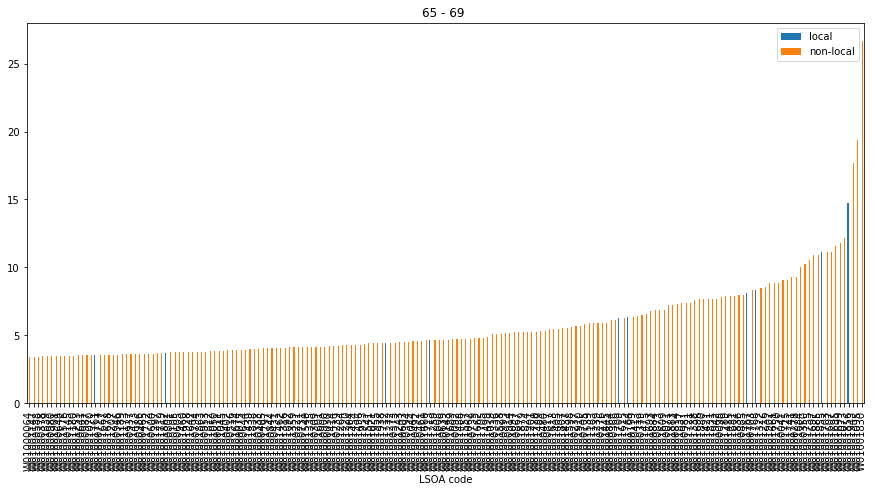

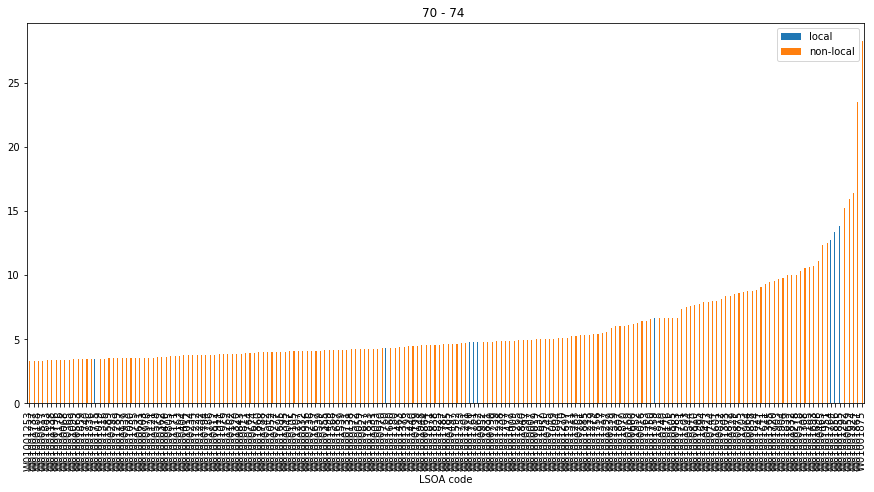

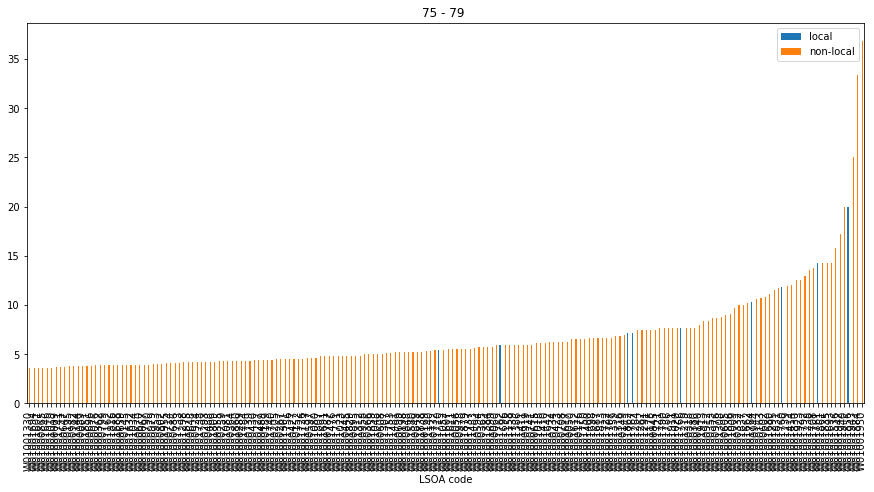

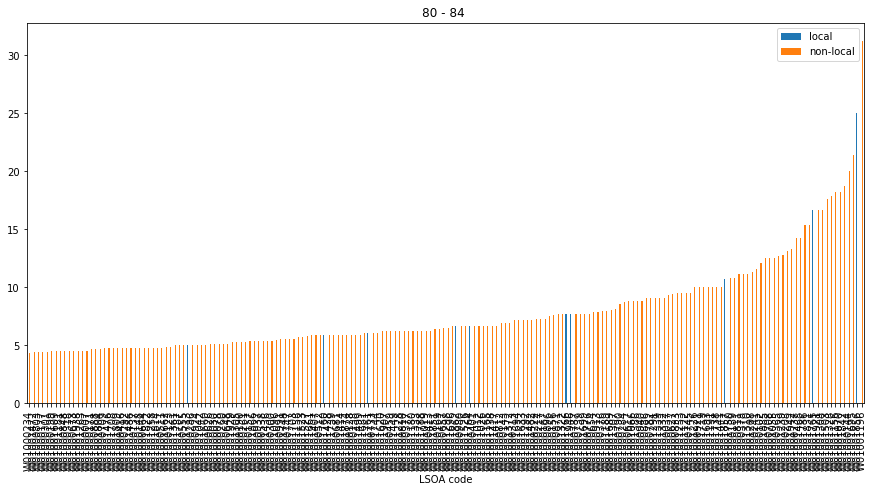

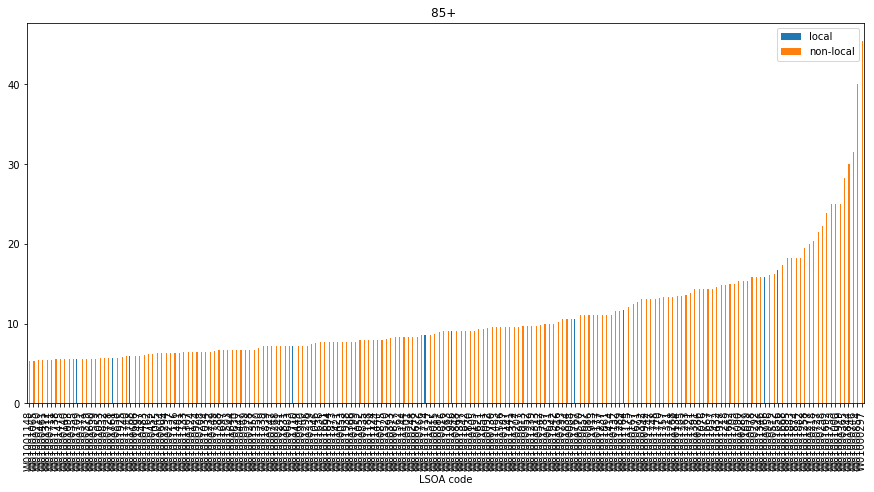

In [17]:
top_10pc_local = {}
for stat in data.drop(columns=['LSOA name', 'local','0- 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=10.0)

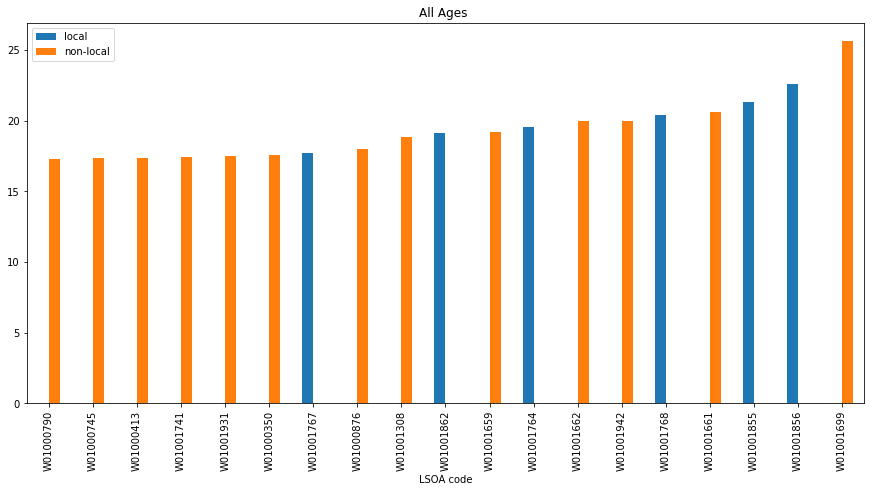

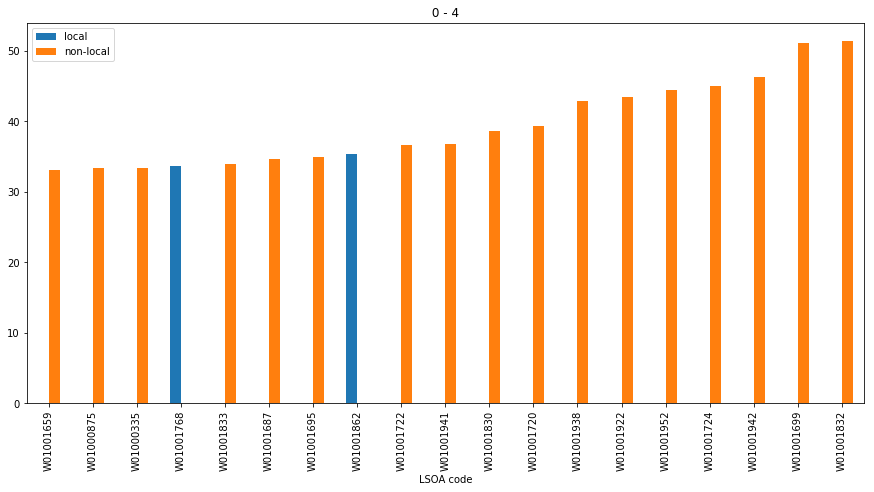

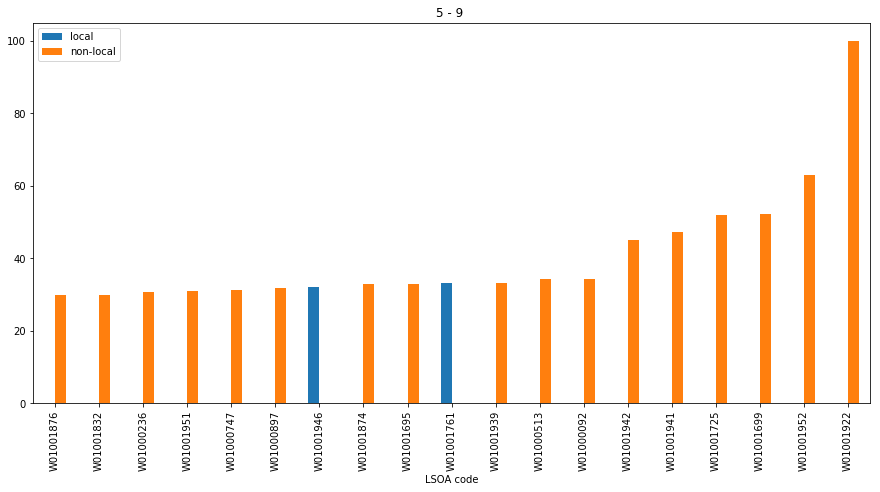

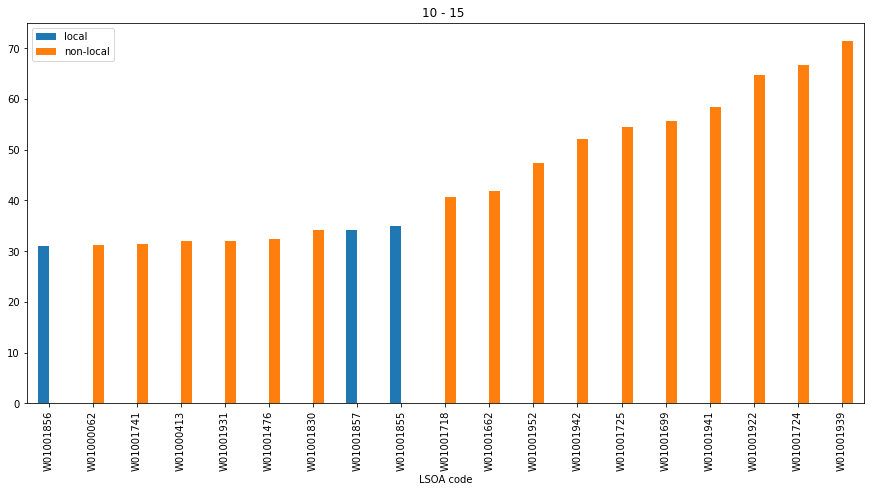

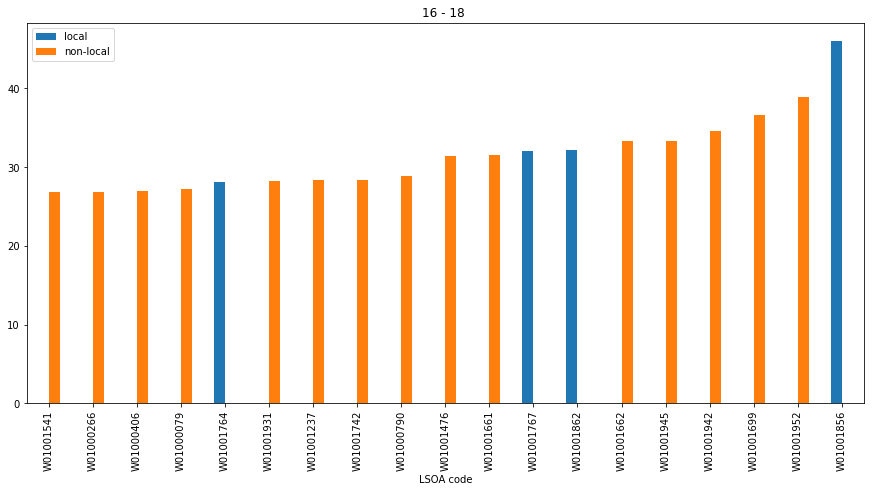

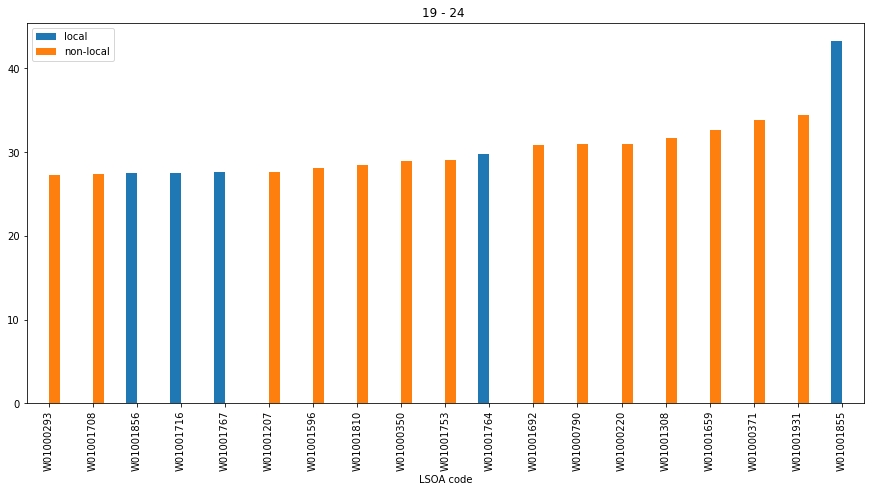

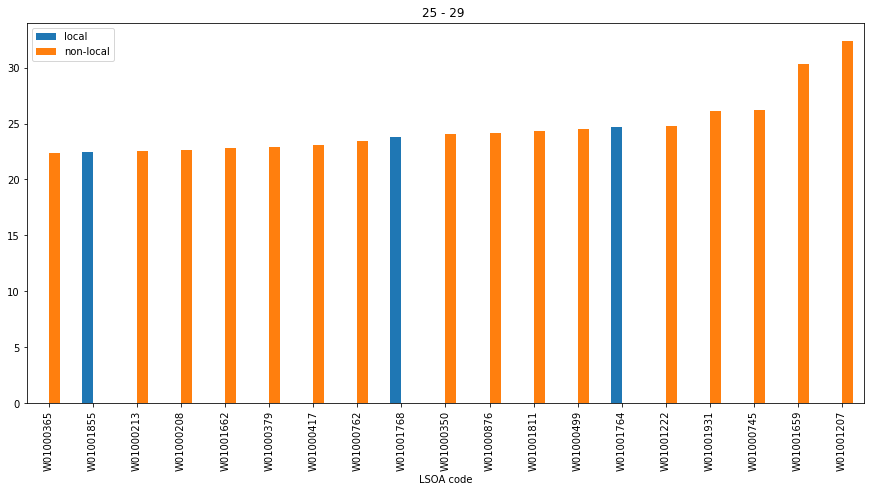

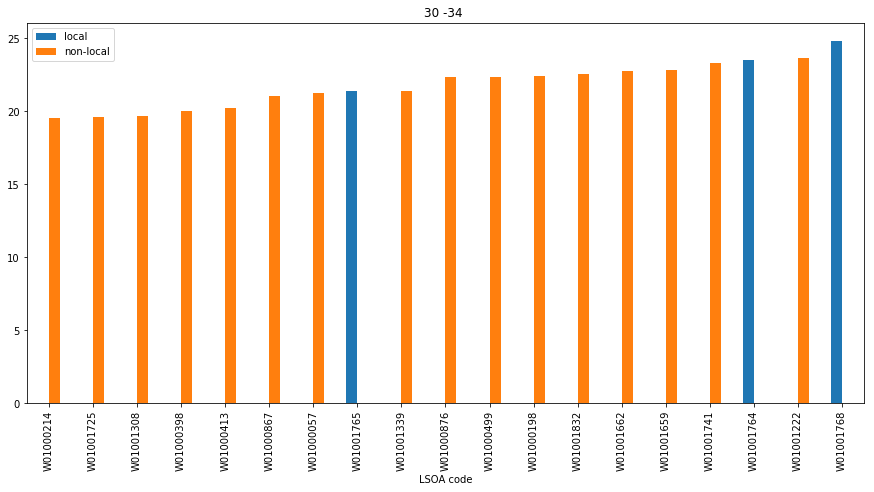

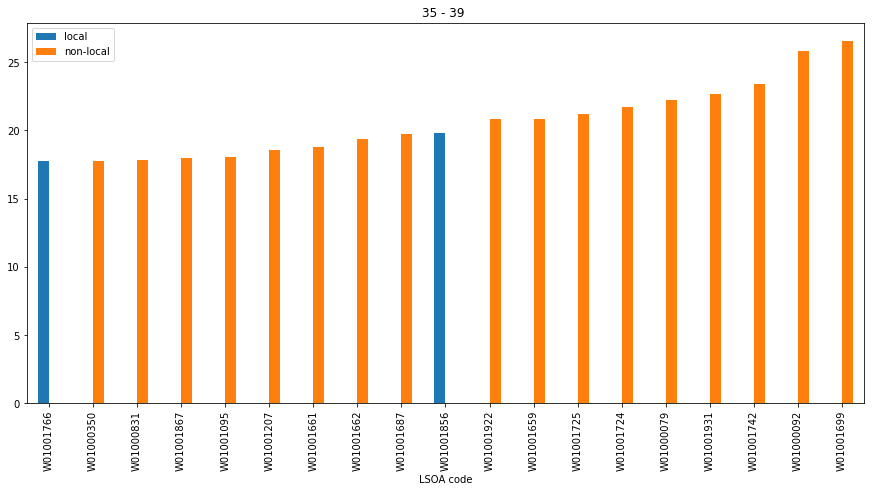

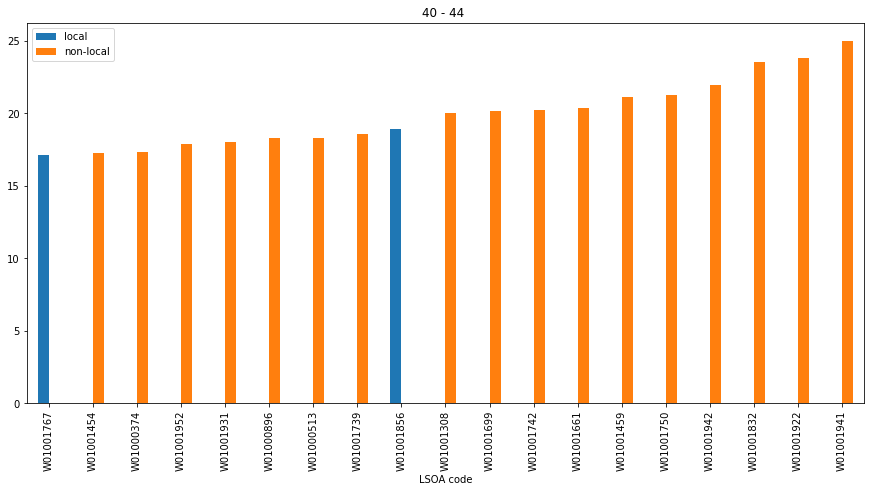

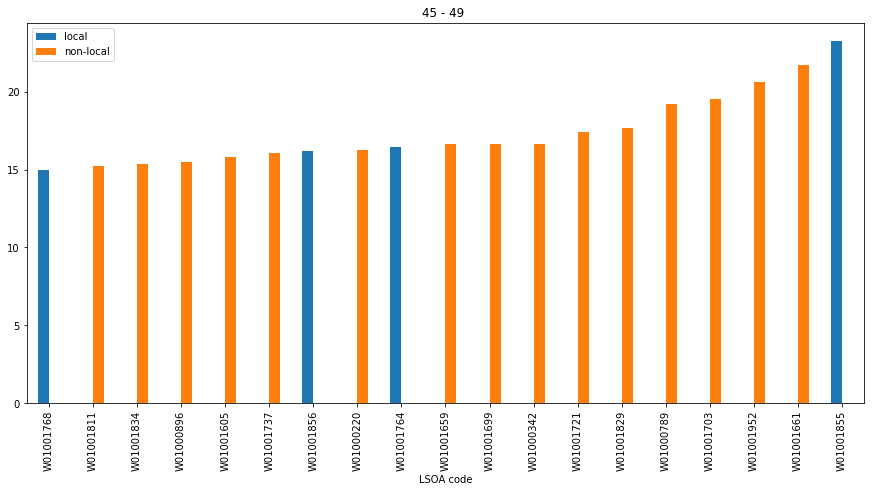

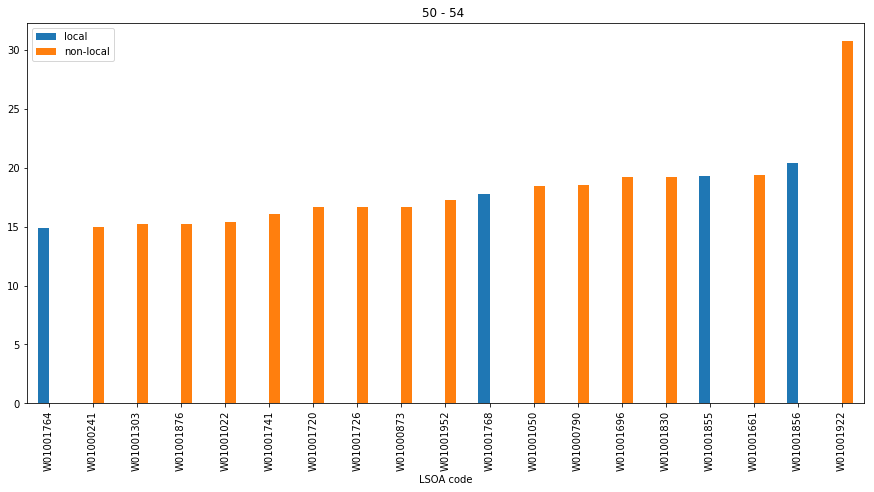

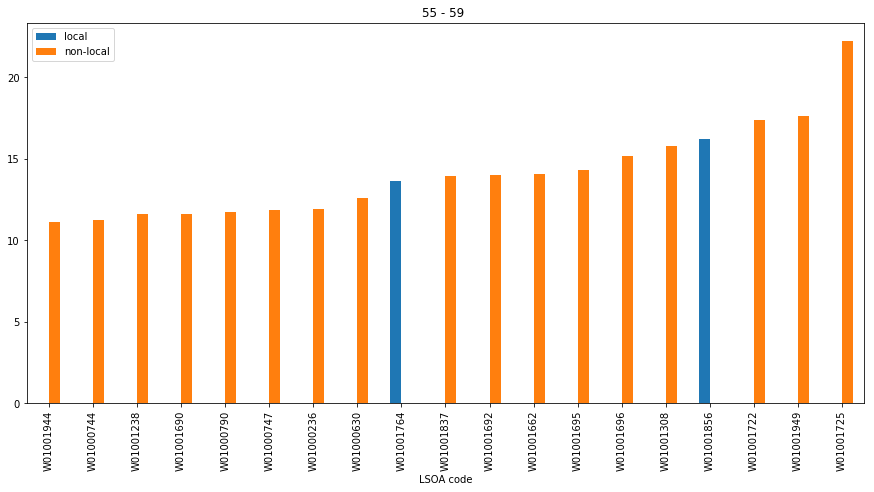

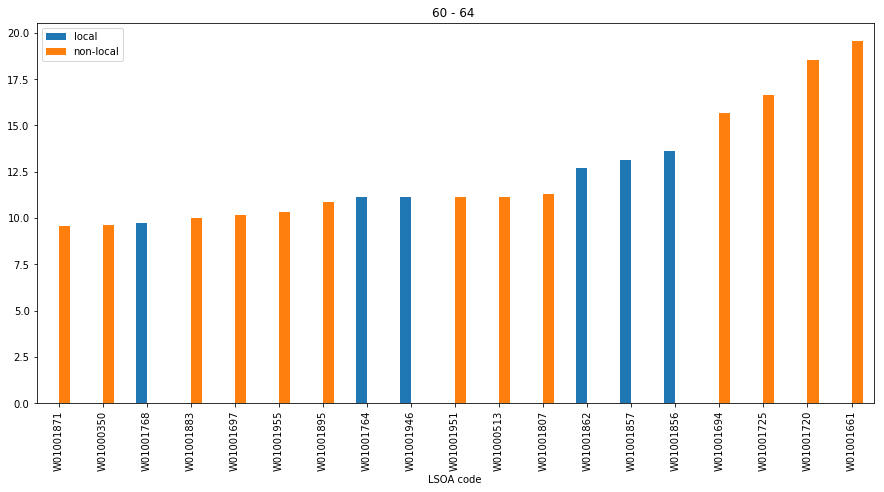

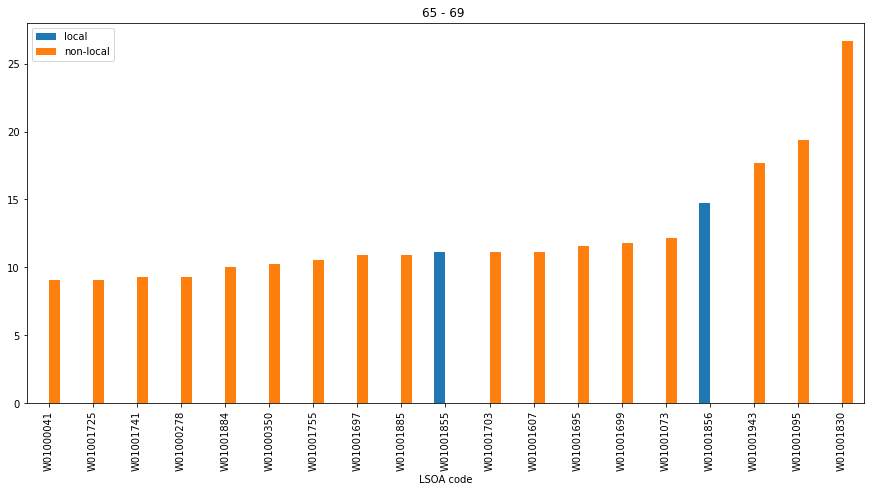

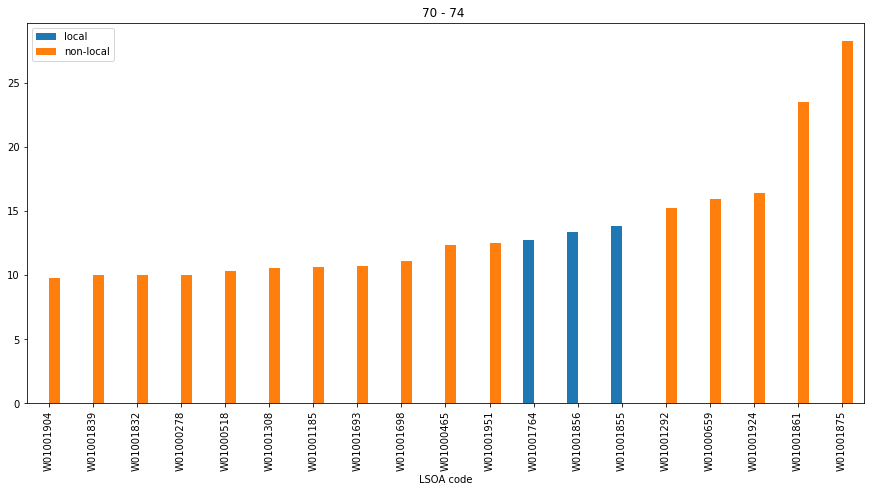

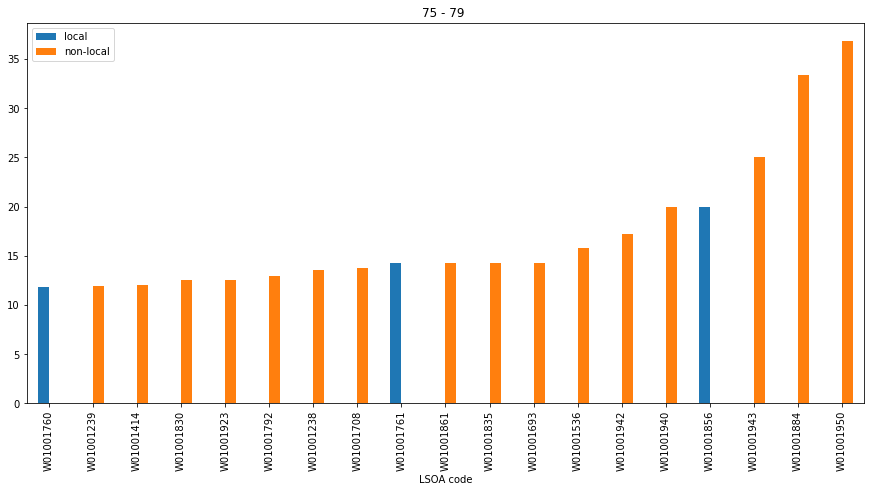

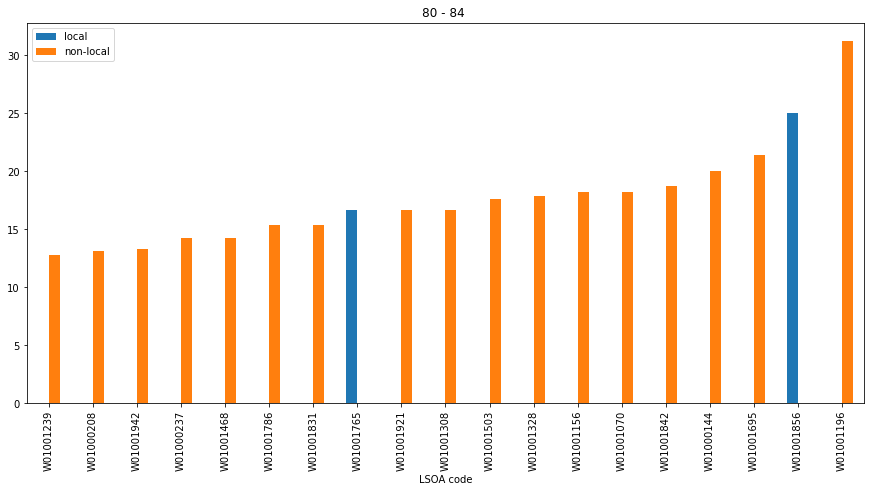

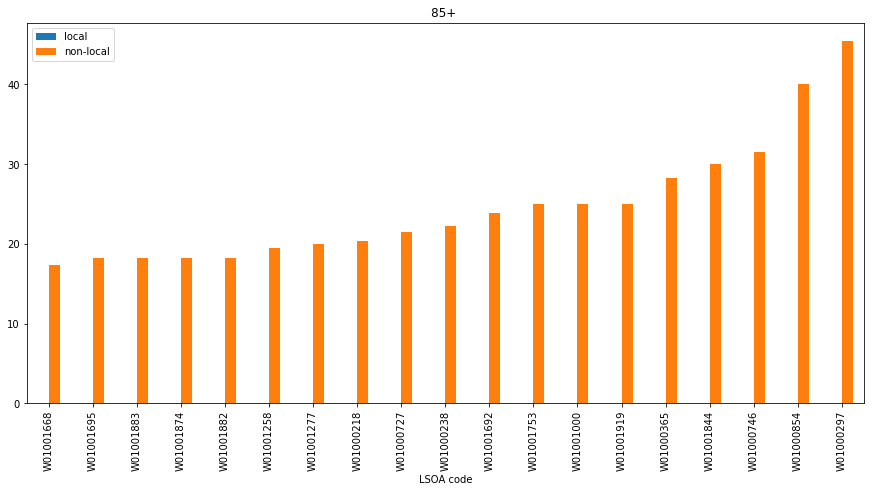

In [6]:
top_1pc_local = {}
for stat in data.drop(columns=['LSOA name', 'local','0- 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data,kind='bar',percentile=1.0)

We now count the number of local LSOAs in the top decile and the top percentile. Here we see that over half (14) of our 23 local LSOAs are in the top decile for overcrowding, and over a quarter (6) of our local LSOAs are in the top percentile. 

In [7]:
top_10pc_count = {key : len(top_10pc_local[key]) for key in top_10pc_local.keys()}
top_1pc_count = {key : len(top_1pc_local[key]) for key in top_1pc_local.keys()}
top_10pc_count_df = pd.DataFrame.from_dict(top_10pc_count, orient='index')
top_1pc_count_df = pd.DataFrame.from_dict(top_1pc_count, orient='index')
top_1_10_pc_df = pd.concat([top_10pc_count_df,top_1pc_count_df],axis=1,keys=['10 pc','1 pc'])
top_1_10_pc_df

,10 pc,1 pc
,0,0
All Ages,14,6
0 - 4,12,2
5 - 9,12,2
10 - 15,16,3
16 - 18,13,4
19 - 24,13,5
25 - 29,13,3
30 -34,10,3
35 - 39,9,2


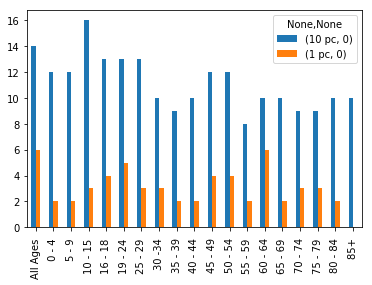

In [8]:
top_1_10_pc_df.plot(kind='bar')

Above we looked at extreme values. Below we use box plots to understand the distribution of the data. We can see that the local households are on average much more overcrowded than the average for Wales.  

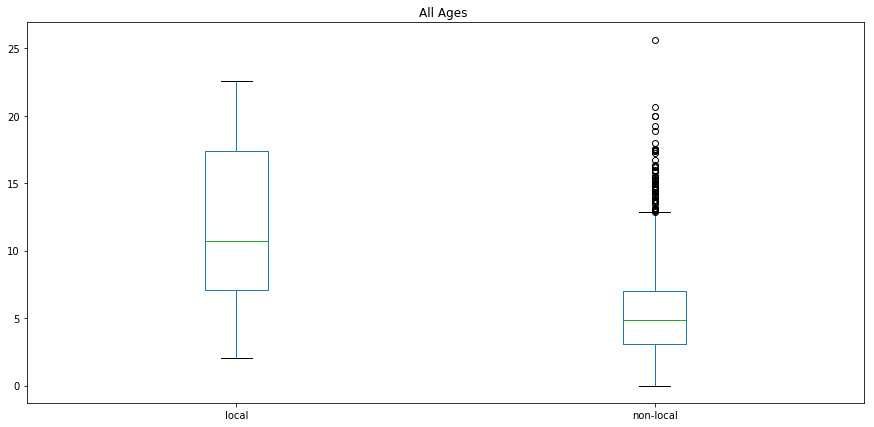

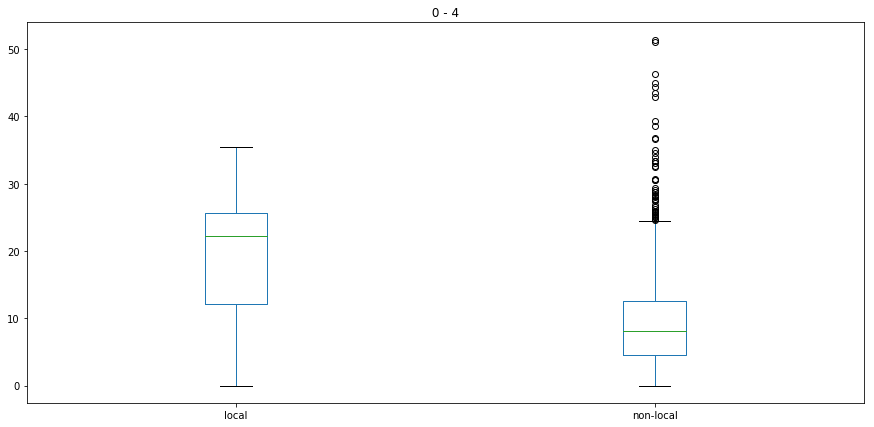

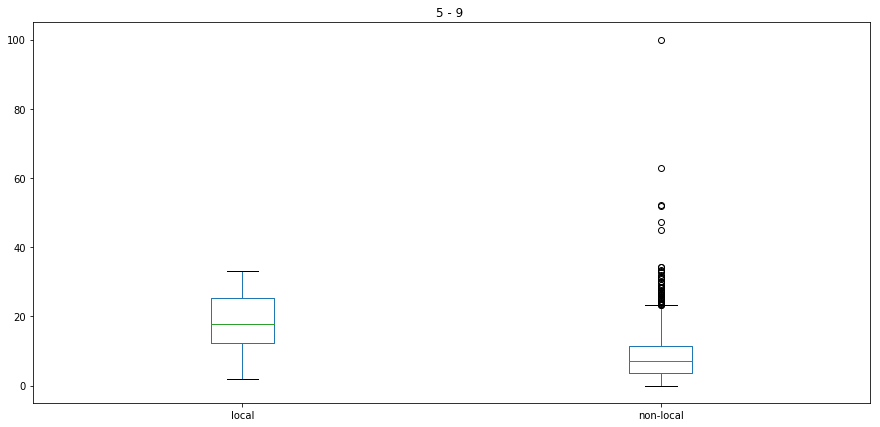

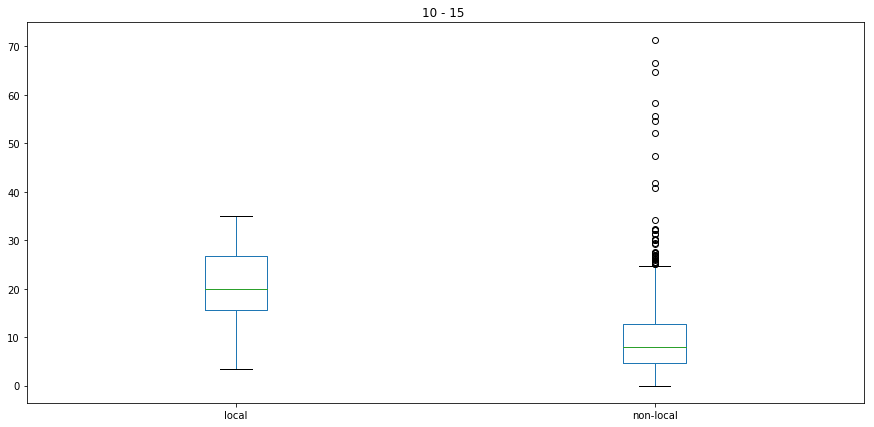

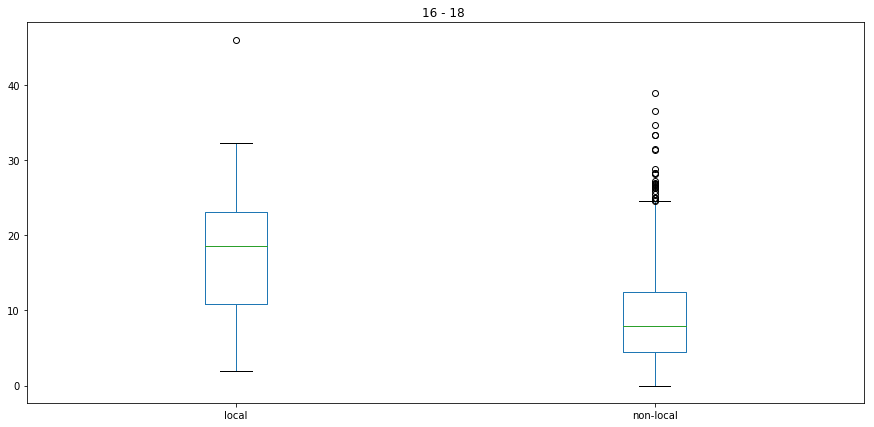

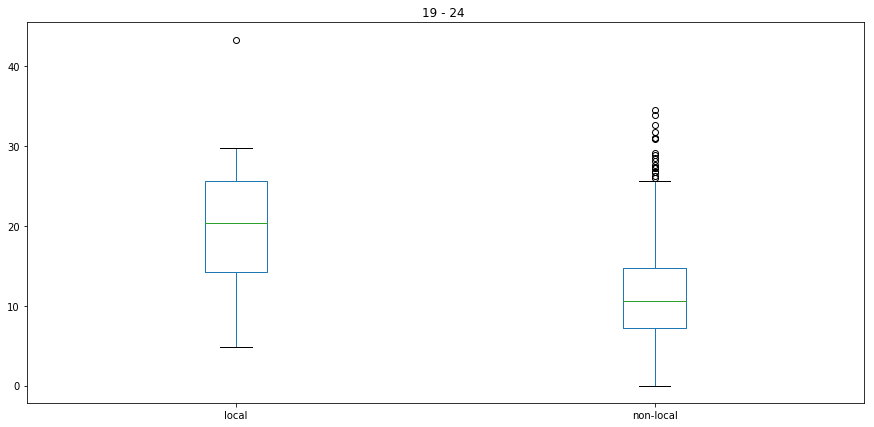

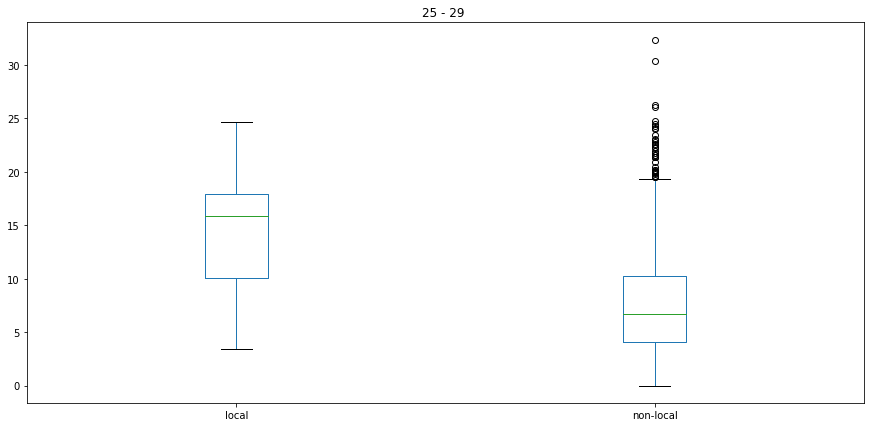

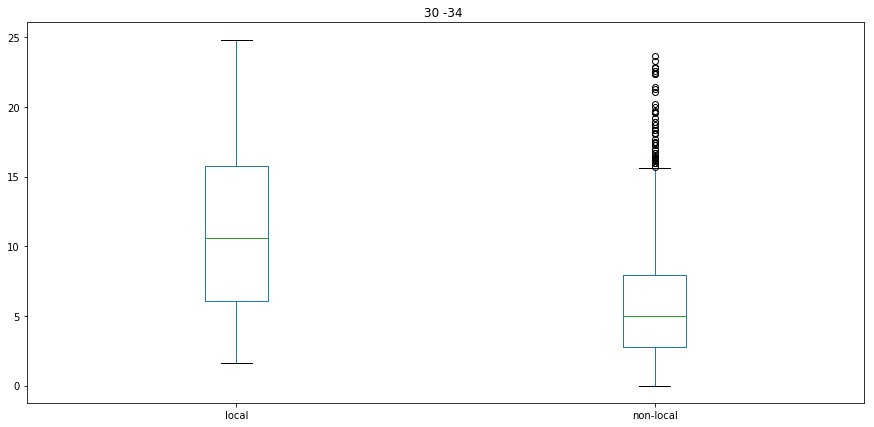

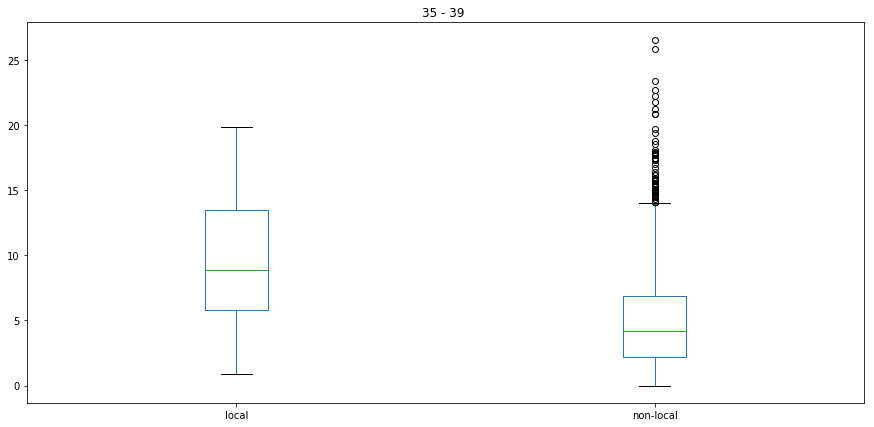

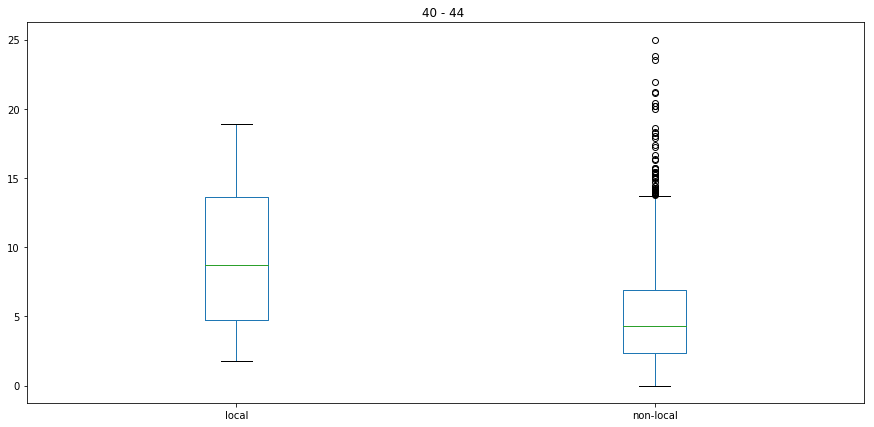

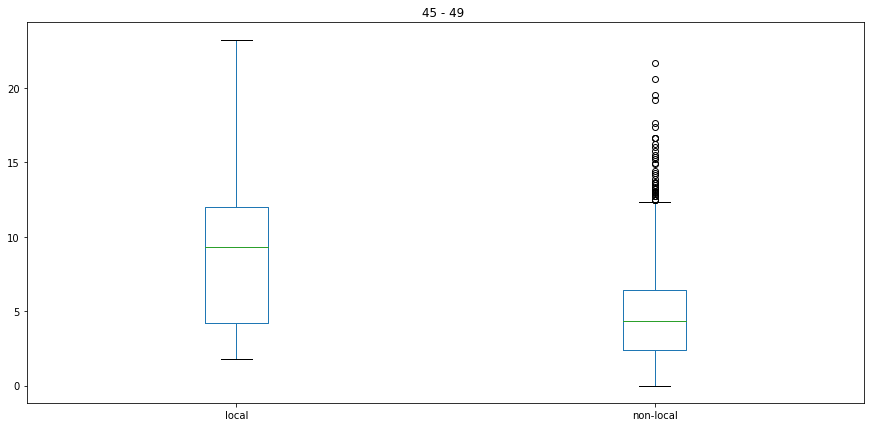

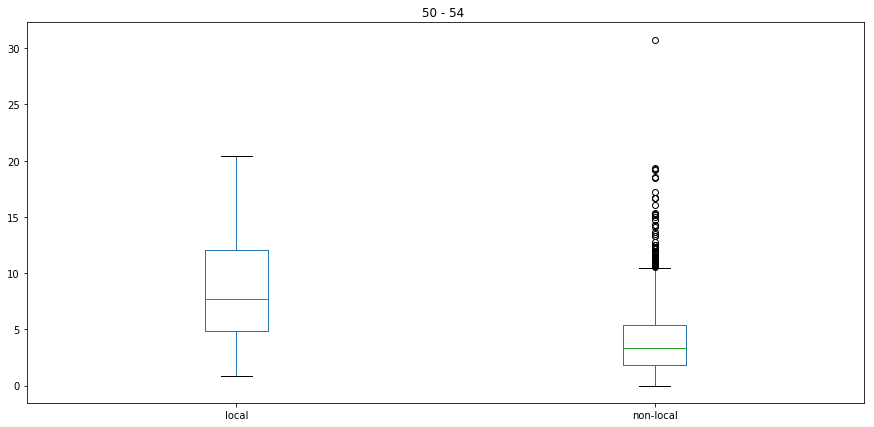

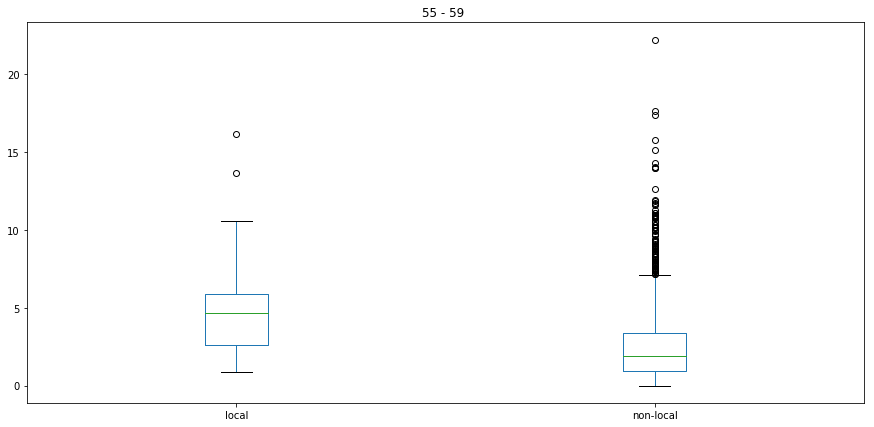

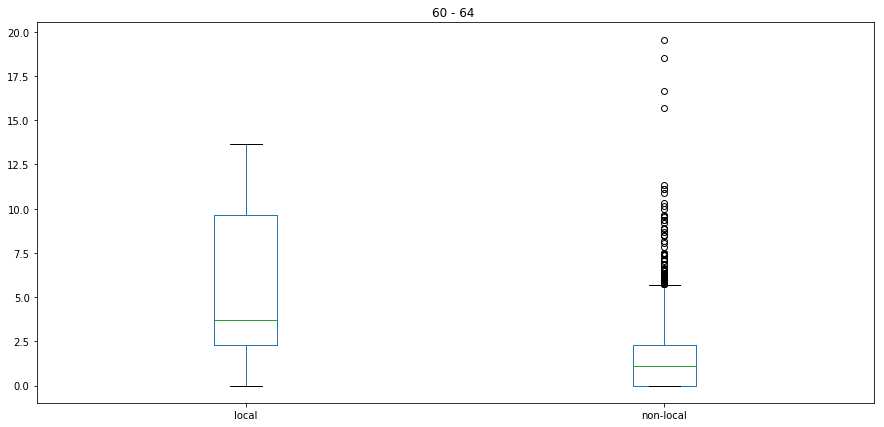

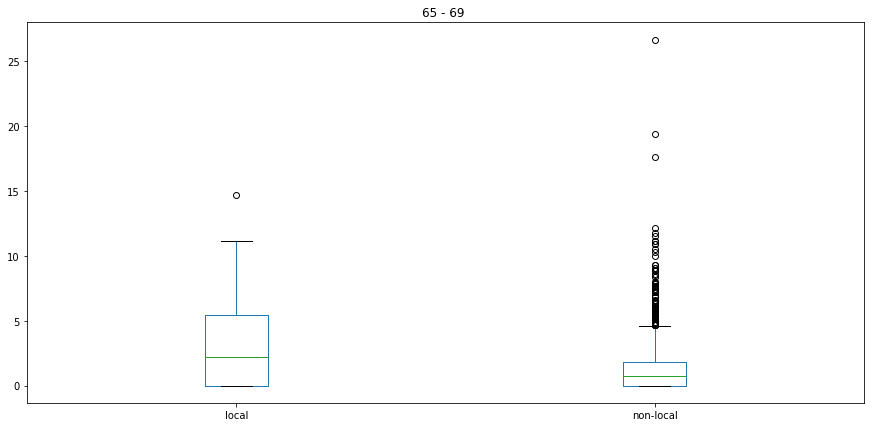

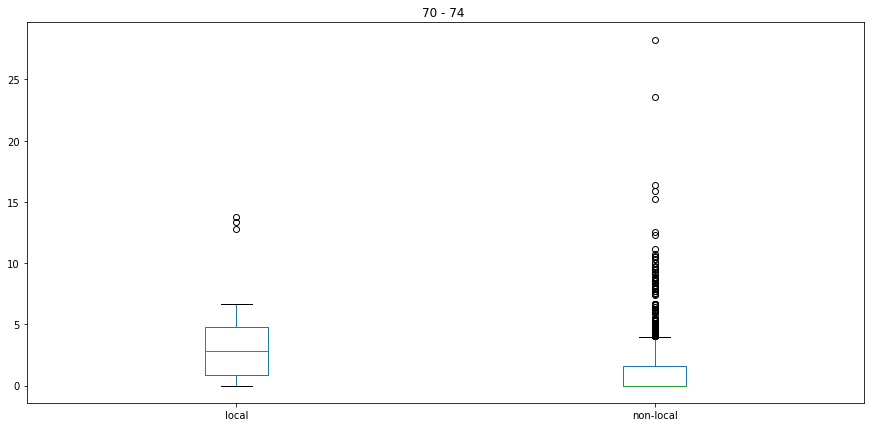

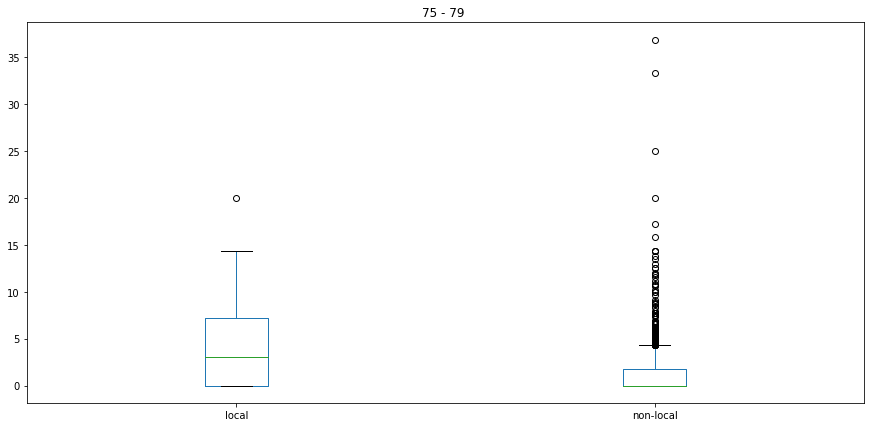

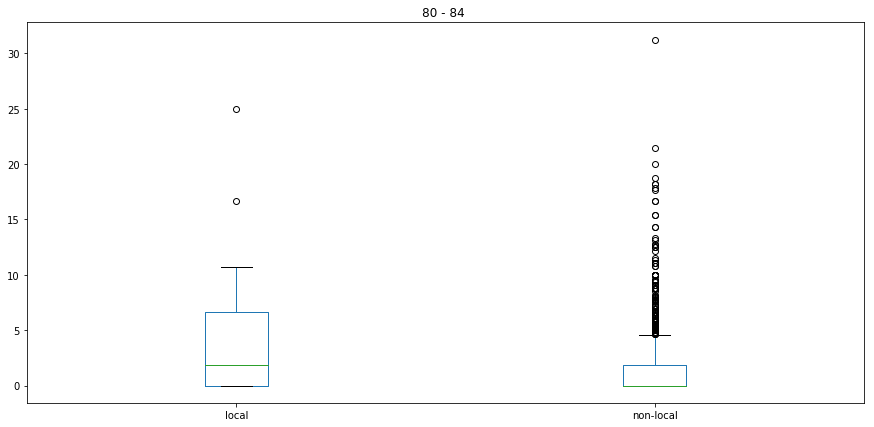

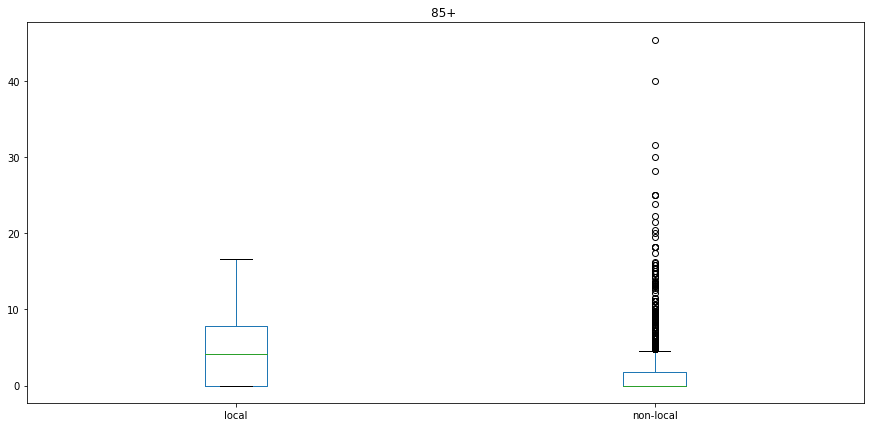

In [9]:
for stat in data.drop(columns=['LSOA name', 'local','0- 15 ', '0 - 18 ', '16 - 64 ', '65+ ']).keys():
    plot_two_data_sets(stat=stat,data=data,kind='box')

The overcrowding data is a percentage of people in the area. We now use the age data to work out total number of people in overcrowded households by age group, rather than percentages. The age data is only available in the larger age groups, so we use these in the analysis below. This shows similar trends to the above analysis.  

We first load up the age data, in the same way as done in the age.ipynb notebook. 

In [10]:
lsoa_name_to_code_dict = np.load("../utilities/name_to_code_dict.npy").item(0)
file = '/Users/iain/Documents/SRCDC_cardiff_data_analysis/codes/age/age.xlsx'
ages = pd.read_excel(file,skiprows=1)
ages = ages.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
ages = ages.drop([0,1,2,3])
ages = ages.rename(columns={'Unnamed: 8': 'Total','Unnamed: 4': 'LSOA name'})
ages = ages.rename(columns={'Aged 0 to 15 ': '0- 15 ', 'Aged 16 to 64 ': '16 - 64 ', 'Aged over 65 ': '65+ ',\
                           'Total': 'All Ages '})
ages = ages.dropna()
ages['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.strip(), ages['LSOA name']))
ages['LSOA name'] =  list(map(lambda lsoa_name : lsoa_name.replace("Rhydfelen Central / Llan ",\
                                                                   "Rhydfelen Central/Ilan "), ages['LSOA name']))
ages['LSOA code'] =  list(map(lambda lsoa_name : lsoa_name_to_code_dict[lsoa_name], ages['LSOA name']))
ages = ages.set_index('LSOA code')
ages = ages.drop(columns=['LSOA name']) 
ages['local'] = list(map(lambda lsoa : int(np.isin(lsoa,lsoa_codes)), ages.index.values))

Dropping the smaller age groups, we make a new dataframe with the number of people in overcrowded households. The age data and the overcrowding data come from different sources, so this is only an apporximation. 

In [11]:
data_num_ppl = ages/100 * data.drop(columns=['0 - 18 ',' 0 - 4 ', '5 - 9 ', '10 - 15 ', '16 - 18 ', '19 - 24 ', '25 - 29 ',
       '30 -34 ', '35 - 39 ', '40 - 44 ', '45 - 49 ', '50 - 54 ', '55 - 59 ',
       '60 - 64 ', '65 - 69 ', '70 - 74 ', '75 - 79 ', '80 - 84 ', '85+ ','LSOA name'])
data_num_ppl['local']*=100 #Make sure local is only 0 or 1

Below we repeat the analysis we did before, only this time on the number of people rather than the percentage of people.

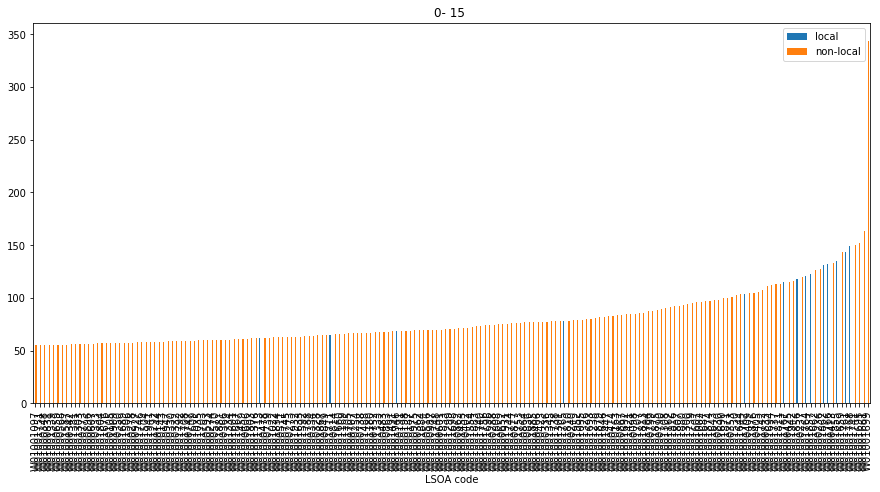

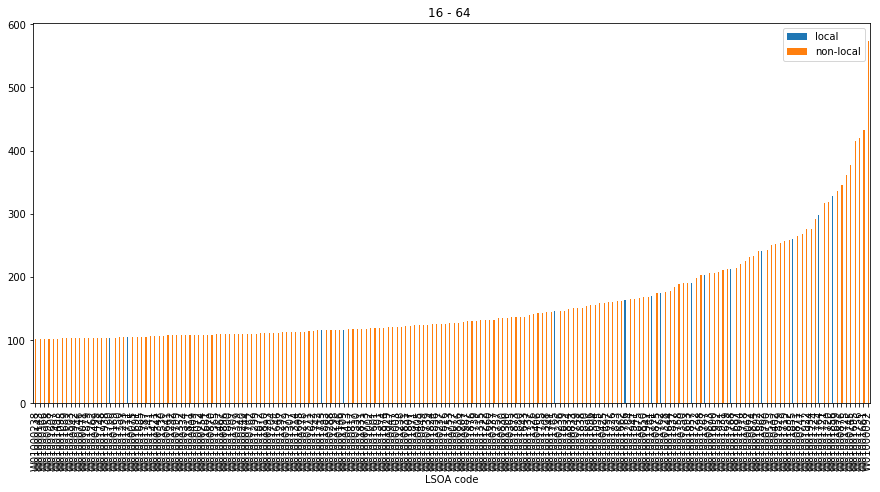

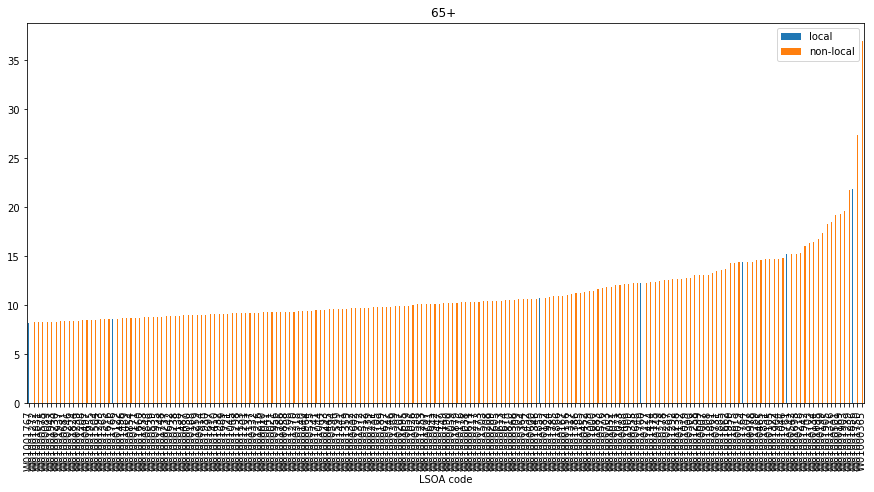

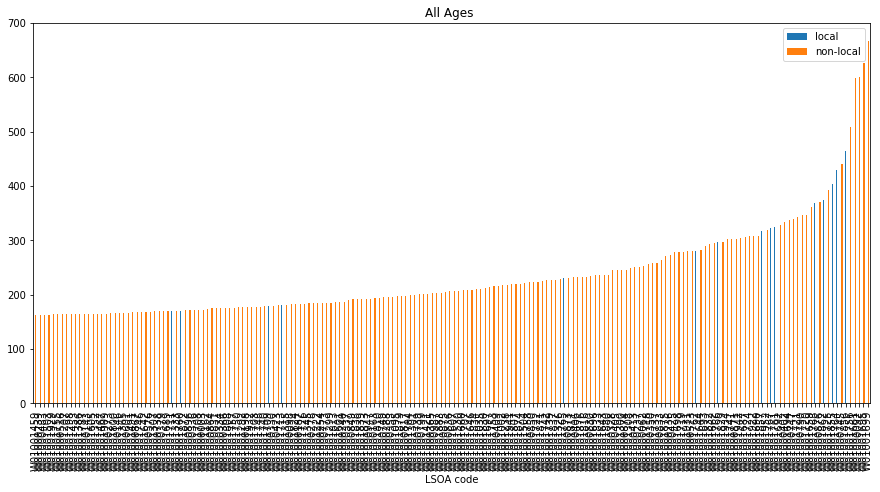

In [12]:
top_10pc_local = {}
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='bar',percentile=10.0)

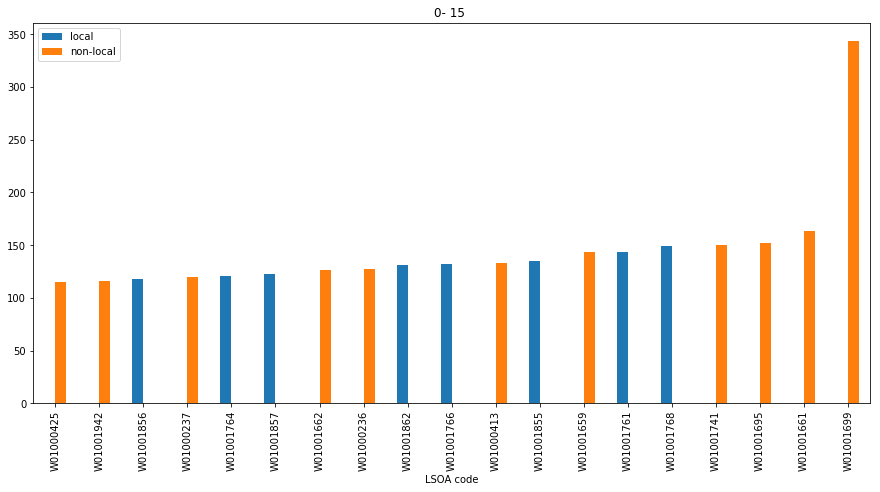

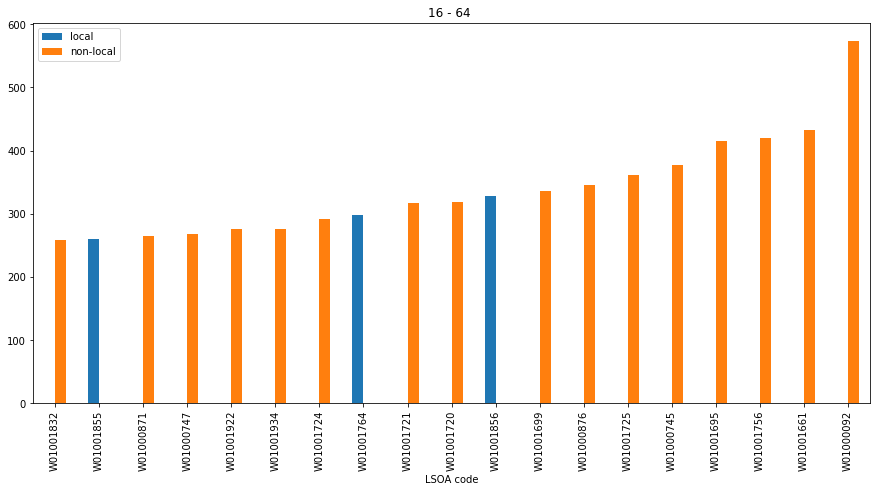

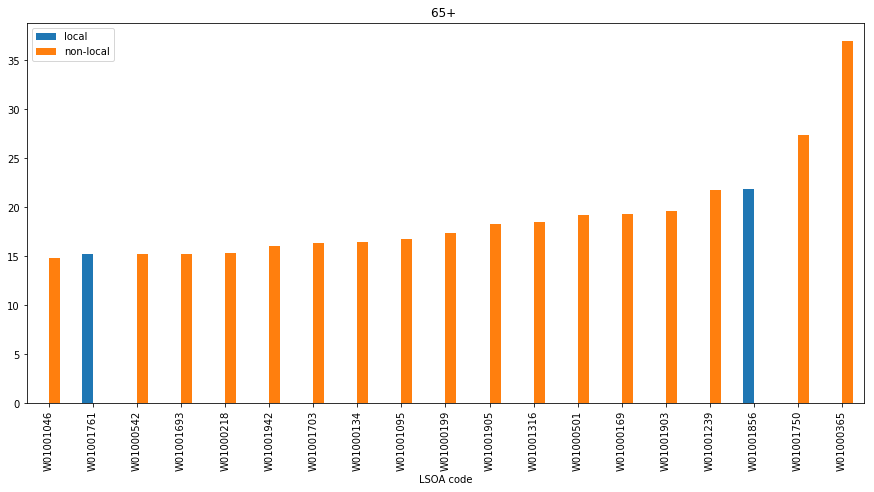

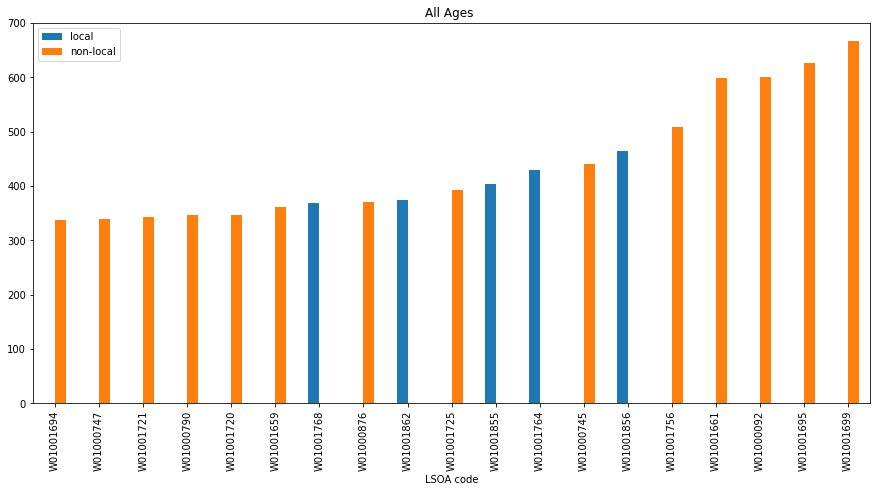

In [13]:
top_1pc_local = {}
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_1pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='bar',percentile=1.0)

In [14]:
top_10pc_count = {key : len(top_10pc_local[key]) for key in top_10pc_local.keys()}
top_1pc_count = {key : len(top_1pc_local[key]) for key in top_1pc_local.keys()}
top_10pc_count_df = pd.DataFrame.from_dict(top_10pc_count, orient='index')
top_1pc_count_df = pd.DataFrame.from_dict(top_1pc_count, orient='index')
top_1_10_pc_df = pd.concat([top_10pc_count_df,top_1pc_count_df],axis=1,keys=['10 pc','1 pc'])
top_1_10_pc_df

,10 pc,1 pc
,0,0
0- 15,14,8
16 - 64,15,3
65+,7,2
All Ages,15,5


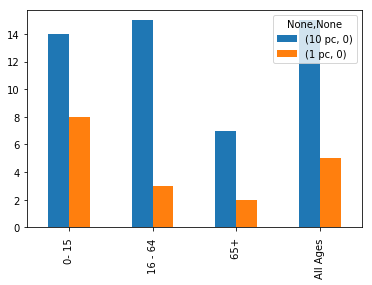

In [15]:
top_1_10_pc_df.plot(kind='bar')

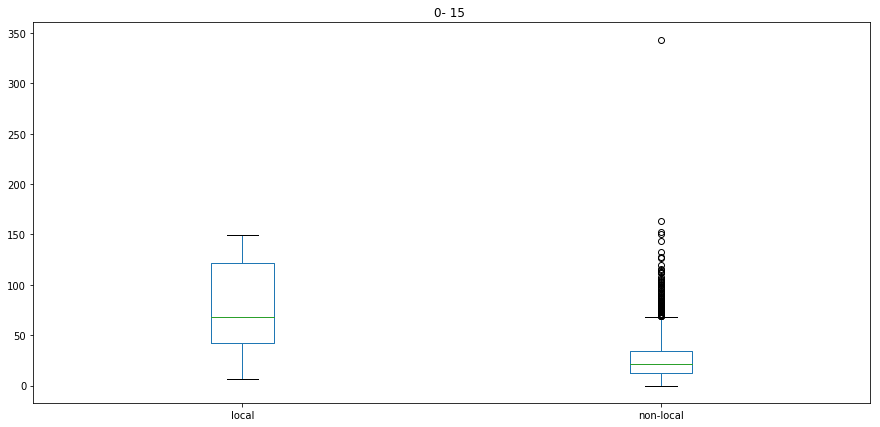

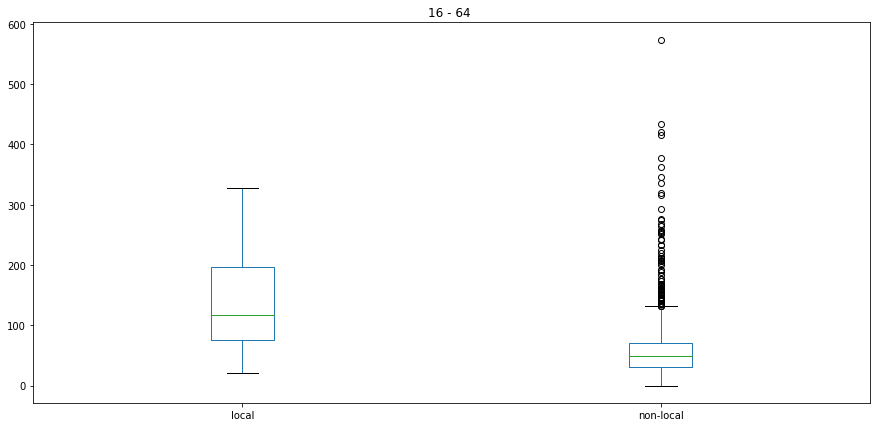

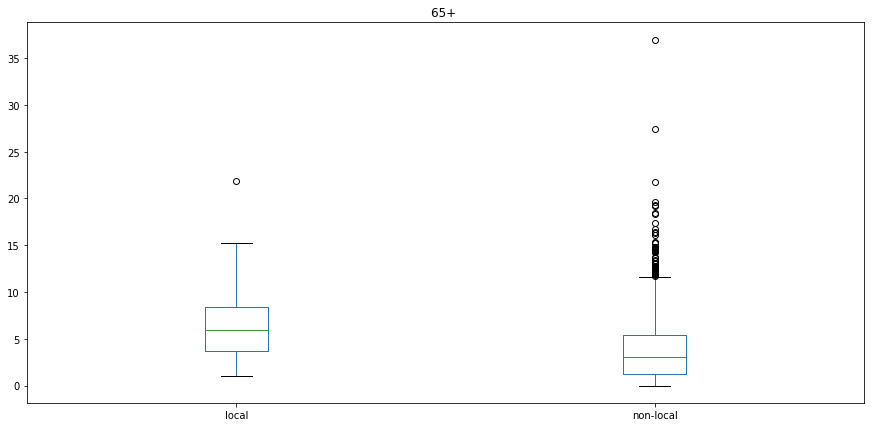

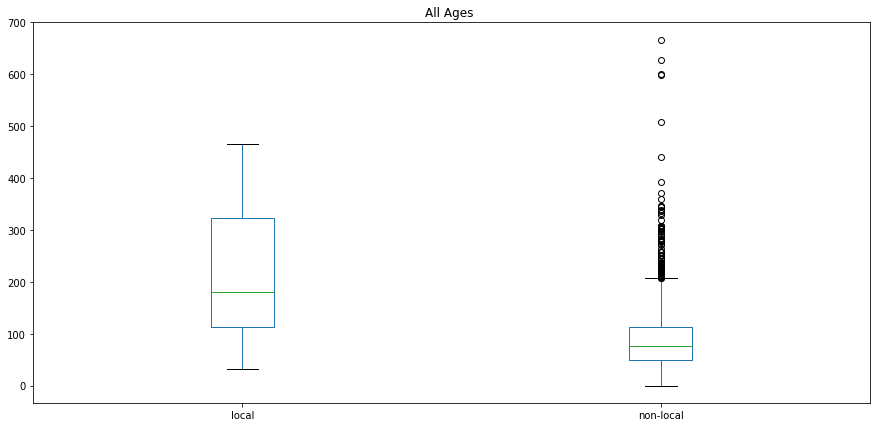

In [16]:
for stat in data_num_ppl.drop(columns=['local']).keys():
    top_10pc_local[stat] = plot_two_data_sets(stat=stat,data=data_num_ppl,kind='box')